# <font color='blue'>Data Science and Machine Learning with Julia Language</font>

## <font color='blue'>Machine Learning with Julia Language</font>

In [1]:
# Create and instance an env
using Pkg
Pkg.activate("env")
Pkg.instantiate()

  Activating project at `C:\MyBkp\Cursos\DSA\DSA_Formacao_Cientista_Dados\Curso07_Preparacao_Para_Carreira_de_Cientista_de_Dados\Curso_Bonus_Data_Science_Machine_Learning_com_Linguagem_Julia\1-MP-MLJulia\env`


In [ ]:
# Installing MLJ package
# Pkg.add("MLJ")

In [2]:
# Importing MLJ package in this section
using MLJ

In [3]:
# Describing dataset #61
OpenML.describe_dataset(61)

**Author**: R.A. Fisher   **Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Iris) - 1936 - Donated by Michael Marshall   **Please cite**:   

**Iris Plants Database**   This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is     linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.   This is an exceedingly simple domain.  

### Attribute Information:

```
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
   -- Iris Setosa
   -- Iris Versicolour
   -- Iris Virginica
```


In [4]:
# Loading dataset #61
iris = OpenML.load(61)

Tables.DictColumnTable with 150 rows, 5 columns, and schema:
 :sepallength  Float64
 :sepalwidth   Float64
 :petallength  Float64
 :petalwidth   Float64
 :class        CategoricalArrays.CategoricalValue{String, UInt32}

In [5]:
# Import
import DataFrames

In [6]:
# Converts dataset into dataframe
df = DataFrames.DataFrame(iris)

,sepallength,sepalwidth,petallength,petalwidth,class
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [7]:
# Visualizing a little sample of the dataset
first(df, 4)

,sepallength,sepalwidth,petallength,petalwidth,class
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [8]:
# Dataframe Schema (metadata)
schema(df)

┌─────────────┬───────────────┬──────────────────────────────────┐
│ names       │ scitypes      │ types                            │
├─────────────┼───────────────┼──────────────────────────────────┤
│ sepallength │ Continuous    │ Float64                          │
│ sepalwidth  │ Continuous    │ Float64                          │
│ petallength │ Continuous    │ Float64                          │
│ petalwidth  │ Continuous    │ Float64                          │
│ class       │ Multiclass{3} │ CategoricalValue{String, UInt32} │
└─────────────┴───────────────┴──────────────────────────────────┘


In [9]:
# Extract x and y from the dataframe
# x = predictable variables
# y = target variable (class)
y, X = unpack(df, ==(:class), rng = 123)

(CategoricalArrays.CategoricalValue{String, UInt32}["Iris-virginica", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-versicolor", "Iris-setosa", "Iris-virginica"  …  "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-virginica", "Iris-virginica", "Iris-setosa", "Iris-setosa"], 150×4 DataFrame
 Row │ sepallength  sepalwidth  petallength  petalwidth 
     │ Float64      Float64     Float64      Float64    
─────┼──────────────────────────────────────────────────
   1 │         6.7         3.3          5.7         2.1
   2 │         5.7         2.8          4.1         1.3
   3 │         7.2         3.0          5.8         1.6
   4 │         4.4         2.9          1.4         0.2
   5 │         5.6         2.5          3.9         1.1
   6 │         6.5         3.0          5.2         2.0
   7 │         4.4         3.0          1.3         0.2
   8 │         6.1 

In [10]:
# y variable schema
scitype(y)

AbstractVector{Multiclass{3}} (alias for AbstractArray{Multiclass{3}, 1})

In [11]:
# Function documentation
@doc unpack

# ou ?unpack

```
unpack(table, f1, f2, ... fk;
       wrap_singles=false,
       shuffle=false,
       rng::Union{AbstractRNG,Int,Nothing}=nothing,
       coerce_options...)
```

Horizontally split any Tables.jl compatible `table` into smaller tables or vectors by making column selections determined by the predicates `f1`, `f2`, ..., `fk`. Selection from the column names is without replacement. A *predicate* is any object `f` such that `f(name)` is `true` or `false` for each column `name::Symbol` of `table`.

Returns a tuple of tables/vectors with length one greater than the number of supplied predicates, with the last component including all previously unselected columns.

```
julia> table = DataFrame(x=[1,2], y=['a', 'b'], z=[10.0, 20.0], w=["A", "B"])
2×4 DataFrame
 Row │ x      y     z        w
     │ Int64  Char  Float64  String
─────┼──────────────────────────────
   1 │     1  a        10.0  A
   2 │     2  b        20.0  B

Z, XY, W = unpack(table, ==(:z), !=(:w))
julia> Z
2-element Vector{Float64}:
 10.0
 20.0

julia> XY
2×2 DataFrame
 Row │ x      y
     │ Int64  Char
─────┼─────────────
   1 │     1  a
   2 │     2  b

julia> W  # the column(s) left over
2-element Vector{String}:
 "A"
 "B"
```

Whenever a returned table contains a single column, it is converted to a vector unless `wrap_singles=true`.

If `coerce_options` are specified then `table` is first replaced with `coerce(table, coerce_options)`. See [`ScientificTypes.coerce`](@ref) for details.

If `shuffle=true` then the rows of `table` are first shuffled, using the global RNG, unless `rng` is specified; if `rng` is an integer, it specifies the seed of an automatically generated Mersenne twister. If `rng` is specified then `shuffle=true` is implicit.


In [12]:
# Searching for all ML models available
all_models = models()

192-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :reporting_operations, :reports_feature_importances, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = ABODDetector, package_name = OutlierDetectionNeighbors, ... )
 (name = ABODDetector, package_name = OutlierDetectionPython, ... )
 (name = AEDetector, package_name = OutlierDetectionNetworks, ... )
 (name = ARDRegressor, package_name = ScikitLearn, ... )
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostRegressor, package_name = ScikitL

In [13]:
# Searching for every ML Linear Regressor models available
some_models = models("LinearRegressor")

10-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :reporting_operations, :reports_feature_importances, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = LinearBinaryClassifier, package_name = GLM, ... )
 (name = LinearCountRegressor, package_name = GLM, ... )
 (name = LinearRegressor, package_name = GLM, ... )
 (name = LinearRegressor, package_name = MLJLinearModels, ... )
 (name = LinearRegressor, package_name = MultivariateStats, ... )
 (name = LinearRegressor, package_name = ScikitLearn, ... )
 (name = Multitarget

In [14]:
# Visualizing the details of the model
meta = some_models[3]

(name = "LinearRegressor",
 package_name = "GLM",
 is_supervised = true,
 abstract_type = Probabilistic,
 deep_properties = (),
 docstring = "```\nLinearRegressor\n```\n\nA model type for construc...",
 fit_data_scitype =
     Union{Tuple{Table{<:AbstractVector{<:Continuous}}, AbstractVector{Continuous}}, Tuple{Table{<:AbstractVector{<:Continuous}}, AbstractVector{Continuous}, AbstractVector{<:Union{Continuous, Count}}}},
 human_name = "linear regressor",
 hyperparameter_ranges = (nothing, nothing, nothing, nothing),
 hyperparameter_types = ("Bool",
                         "Bool",
                         "Union{Nothing, Symbol}",
                         "Union{Nothing, AbstractVector{Symbol}}"),
 hyperparameters = (:fit_intercept, :dropcollinear, :offsetcol, :report_keys),
 implemented_methods =
     [:clean!, :fitted_params, :predict, :predict_mean, :fit],
 inverse_transform_scitype = Unknown,
 is_pure_julia = true,
 is_wrapper = false,
 iteration_parameter = nothing,
 load_path = 

In [15]:
# Type of the target variable of the previous model
targetscitype = meta.target_scitype

AbstractVector{Continuous} (alias for AbstractArray{Continuous, 1})

In [16]:
# Verifying if the previous model can be used with the target variable
# We can't because we have a regressor model and we have categorical target variable
scitype(y) <: targetscitype

false

In [17]:
# Function to filter every classification models
filter_julia_classifiers(meta) = AbstractVector{Finite} <: meta.target_scitype && meta.is_pure_julia

filter_julia_classifiers (generic function with 1 method)

In [18]:
# Filter classification models
models(filter_julia_classifiers)

22-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :reporting_operations, :reports_feature_importances, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = BetaML, ... )
 (name = DecisionTreeClassifier, package_name = Decisi

In [19]:
# Which models can be used with x and y variables?
models(matching(X, y))

47-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :reporting_operations, :reports_feature_importances, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = B

In [20]:
# Installing MLJFlux package
Pkg.add("MLJFlux")

    Updating registry at `C:\Users\drena\.julia\registries\General.toml`
   Resolving package versions...
   Installed NNlib ──────────────── v0.8.9
   Installed ShowCases ──────────── v0.1.0
   Installed BFloat16s ──────────── v0.2.0
   Installed TimerOutputs ───────── v0.5.21
   Installed NNlibCUDA ──────────── v0.2.4
   Installed Optimisers ─────────── v0.2.9
   Installed ZygoteRules ────────── v0.2.2
   Installed GPUArrays ──────────── v8.5.0
   Installed Static ─────────────── v0.4.1
   Installed RealDot ────────────── v0.1.0
   Installed MLJFlux ────────────── v0.2.8
   Installed MLUtils ────────────── v0.2.1
   Installed RandomNumbers ──────── v1.5.3
   Installed LLVM ───────────────── v4.14.0
   Installed IRTools ────────────── v0.4.6
   Installed IfElse ─────────────── v0.1.1
   Installed ProgressLogging ────── v0.1.4
   Installed Metalhead ──────────── v0.7.1
   Installed Random123 ──────────── v1.6.0
   Installed Zygote ─────────────── v0.6.45
   Installed ChainRules ───────

In [21]:
# Loading Neural network algorithm
NeuralNetworkClassifier = @load NeuralNetworkClassifier

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\drena\.julia\packages\MLJModels\hAzAn\src\loading.jl:159


import MLJFlux ✔


MLJFlux.NeuralNetworkClassifier

In [22]:
# Creates the model
model = NeuralNetworkClassifier()

NeuralNetworkClassifier(
  builder = Short(
        n_hidden = 0, 
        dropout = 0.5, 
        σ = NNlib.σ), 
  finaliser = NNlib.softmax, 
  optimiser = Flux.Optimise.Adam(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}()), 
  loss = Flux.Losses.crossentropy, 
  epochs = 10, 
  batch_size = 1, 
  lambda = 0.0, 
  alpha = 0.0, 
  rng = Random._GLOBAL_RNG(), 
  optimiser_changes_trigger_retraining = false, 
  acceleration = CPU1{Nothing}(nothing))

In [23]:
# Model information
info(model)

(name = "NeuralNetworkClassifier",
 package_name = "MLJFlux",
 is_supervised = true,
 abstract_type = Probabilistic,
 deep_properties = (:optimiser, :builder),
 docstring = "```\nNeuralNetworkClassifier\n```\n\nA model type for ...",
 fit_data_scitype =
     Tuple{Table{<:AbstractVector{<:Continuous}}, AbstractVector{<:Finite}},
 human_name = "neural network classifier",
 hyperparameter_ranges = (nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing),
 hyperparameter_types = ("MLJFlux.Short",
                         "typeof(NNlib.softmax)",
                         "Flux.Optimise.Adam",
                         "typeof(Flux.Losses.crossentropy)",
                         "Int64",
      

In MLJ a *model* is just a structure containing hyperparameters. A *model* does not store learned parameters and *models* are mutable. To store the learned parameters we use a *machine*.

In [26]:
# Number of epochs to train the model
model.epochs = 30

30

In [27]:
# Verifying if the model is ready to be trained in 30 epochs
NeuralNetworkClassifier(epochs = 30) == model

true

In [28]:
# Creates the object that will store the trained model (machine)
mach = machine(model, X, y)

Machine trained 0 times; caches data
  model: NeuralNetworkClassifier(builder = Short(n_hidden = 0, …), …)
  args: 
    1:	Source @496 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @741 ⏎ `AbstractVector{Multiclass{3}}`


A machine (mach) stores *learned* parameters, among other things. We trained this machine on 70% of the data and evaluated it on 30% of the validation data. Let's start by dividing all row indexes into subsets of `train` and `test`:

In [29]:
# Splitting the data into train and test
train, test = partition(1:length(y), 0.7)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  96, 97, 98, 99, 100, 101, 102, 103, 104, 105], [106, 107, 108, 109, 110, 111, 112, 113, 114, 115  …  141, 142, 143, 144, 145, 146, 147, 148, 149, 150])

In [30]:
# Training the model
fit!(mach, rows = train, verbosity = 2)

┌ Info: Training machine(NeuralNetworkClassifier(builder = Short(n_hidden = 0, …), …), …).
└ @ MLJBase C:\Users\drena\.julia\packages\MLJBase\Fl6Zc\src\machines.jl:498
┌ Info: Loss is 1.095
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.063
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.05
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 0.9819
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.006
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 0.9776
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 0.9528
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 0.9442
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 0.9278
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJ

Machine trained 1 time; caches data
  model: NeuralNetworkClassifier(builder = Short(n_hidden = 0, …), …)
  args: 
    1:	Source @496 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @741 ⏎ `AbstractVector{Multiclass{3}}`


In [31]:
# Predictions with the trained model using test subset
yhat = predict(mach, rows = test)

45-element CategoricalDistributions.UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.184, Iris-versicolor=>0.412, Iris-virginica=>0.404)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.152, Iris-versicolor=>0.414, Iris-virginica=>0.433)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.626, Iris-versicolor=>0.264, Iris-virginica=>0.111)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.107, Iris-versicolor=>0.413, Iris-virginica=>0.48)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.0931, Iris-versicolor=>0.411, Iris-virginica=>0.496)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.622, Iris-versicolor=>0.267, Iris-virginica=>0.112)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.139, Iris-versicolor=>0.414, Iris-virginica=>0.447)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.159, Iris-versicolor=>0.414, Iris-virginica=>0.427)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.111, Iris-versicolor=>0.413, Iris-virginica=>0.476)


In [32]:
# Visualizing some predictions
yhat[1:5]

5-element CategoricalDistributions.UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.184, Iris-versicolor=>0.412, Iris-virginica=>0.404)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.152, Iris-versicolor=>0.414, Iris-virginica=>0.433)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.626, Iris-versicolor=>0.264, Iris-virginica=>0.111)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.107, Iris-versicolor=>0.413, Iris-virginica=>0.48)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.0931, Iris-versicolor=>0.411, Iris-virginica=>0.496)

In [33]:
# Model's structure
fitted_params(mach)

(chain = Chain(Chain(Dense(4 => 3, σ), Dropout(0.5), Dense(3 => 3)), softmax),)

In [34]:
# Error report throughout training
report(mach)

(training_losses = [1.0313327149013345, 1.094678737222779, 1.0626054965567409, 1.0501224292859999, 0.9819390133537828, 1.005601038499376, 0.9776316248925471, 0.9527787802110075, 0.9442154619836155, 0.9278315420249625  …  0.8121147979586336, 0.8776642404476613, 0.847027531500855, 0.8250966272277187, 0.8668947367982454, 0.867235008134675, 0.804788052712021, 0.852347777049318, 0.8349146136226034, 0.8075178885822851],)

In [35]:
# Calculates the mean error
erro_medio = cross_entropy(predict(mach, X), y) |> mean

0.6883513848429255

In [36]:
# We modify the model's hyperparameter
model.optimiser.eta = model.optimiser.eta * 2

0.002

In [37]:
# We recreate the machine
mach = machine(model, X, y)

Machine trained 0 times; caches data
  model: NeuralNetworkClassifier(builder = Short(n_hidden = 0, …), …)
  args: 
    1:	Source @549 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @854 ⏎ `AbstractVector{Multiclass{3}}`


In [38]:
# Training the model again
fit!(mach, rows = train, verbosity = 2)

┌ Info: Training machine(NeuralNetworkClassifier(builder = Short(n_hidden = 0, …), …), …).
└ @ MLJBase C:\Users\drena\.julia\packages\MLJBase\Fl6Zc\src\machines.jl:498
┌ Info: Loss is 1.295
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.23
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.157
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.18
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.132
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.1
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.096
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.095
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5DQ\src\core.jl:105
┌ Info: Loss is 1.052
└ @ MLJFlux C:\Users\drena\.julia\packages\MLJFlux\jJ5

Machine trained 1 time; caches data
  model: NeuralNetworkClassifier(builder = Short(n_hidden = 0, …), …)
  args: 
    1:	Source @549 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @854 ⏎ `AbstractVector{Multiclass{3}}`


In [39]:
# Model's mean error
erro_medio = cross_entropy(predict(mach, X), y) |> mean

0.6140995090343341

In [40]:
# Range of values to create the learning curve
r = range(model, :epochs, lower = 1, upper = 200, scale = :log10)

NumericRange(1 ≤ epochs ≤ 200; origin=100.5, unit=99.5; on log10 scale)

In [41]:
# Learning curve throughout the training
curva_aprendizado = learning_curve(model,
                                   X,
                                   y,
                                   range = r,
                                   resampling = Holdout(fraction_train = 0.7),
                                   measure = cross_entropy)

┌ Info: Training machine(ProbabilisticTunedModel(model = NeuralNetworkClassifier(builder = Short(n_hidden = 0, …), …), …), …).
└ @ MLJBase C:\Users\drena\.julia\packages\MLJBase\Fl6Zc\src\machines.jl:498
┌ Info: Attempting to evaluate 25 models.
└ @ MLJTuning C:\Users\drena\.julia\packages\MLJTuning\DO54j\src\tuned_models.jl:727
Evaluating over 25 metamodels: 100%[=========================] Time: 0:00:05


(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [1, 2, 3, 4, 5, 6, 7, 9, 11, 13  …  39, 46, 56, 67, 80, 96, 116, 139, 167, 200],
 measurements = [1.0900563415506774, 1.0385147342100902, 0.9966562674507013, 0.9686860257039845, 0.939037045537272, 0.9074913010921409, 0.8700272687848801, 0.8219982611006716, 0.7733818191939951, 0.7352489622955913  …  0.5415189195603484, 0.5148272802697769, 0.47202355284249253, 0.4479616146521908, 0.4261517166853637, 0.3911977828082468, 0.37187454038167544, 0.3490800878265858, 0.32741204833775583, 0.33418226823909686],)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


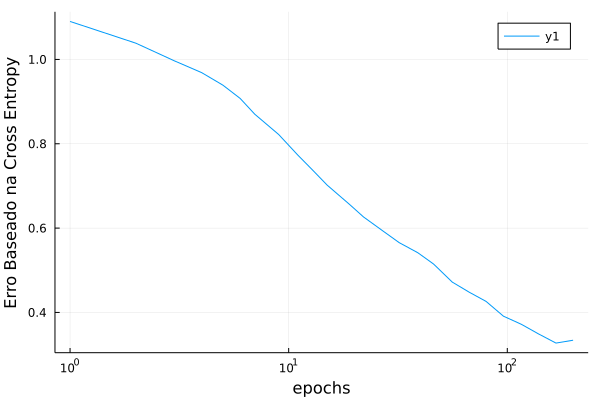

In [42]:
# Plotting the learning curve
using Plots
plot(curva_aprendizado.parameter_values,
     curva_aprendizado.measurements,
     xlab = curva_aprendizado.parameter_name,
     xscale = curva_aprendizado.parameter_scale,
     ylab = "Erro Baseado na Cross Entropy")

In [43]:
# Saving the model into the disk
MLJ.save("modelo/modelo_rede_neural_DRGM.jlso", mach)

In [44]:
# Loading the model from the disk
mach2 = machine("modelo/modelo_rede_neural_DRGM.jlso")

Machine trained 1 time; caches data
  model: NeuralNetworkClassifier(builder = Short(n_hidden = 0, …), …)
  args: 


In [46]:
# Making predictions with test subset
yhat = predict(mach2, X[test,:])

45-element CategoricalDistributions.UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.188, Iris-versicolor=>0.417, Iris-virginica=>0.394)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.153, Iris-versicolor=>0.403, Iris-virginica=>0.444)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.746, Iris-versicolor=>0.218, Iris-virginica=>0.0364)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.122, Iris-versicolor=>0.381, Iris-virginica=>0.497)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.0999, Iris-versicolor=>0.367, Iris-virginica=>0.533)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.707, Iris-versicolor=>0.247, Iris-virginica=>0.0459)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.142, Iris-versicolor=>0.399, Iris-virginica=>0.46)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.175, Iris-versicolor=>0.411, Iris-virginica=>0.414)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.129, Iris-versicolor=>0.386, Iris-virginica=>0.485

In [47]:
# Visualizing some predictions
yhat[1:5]

5-element CategoricalDistributions.UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.188, Iris-versicolor=>0.417, Iris-virginica=>0.394)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.153, Iris-versicolor=>0.403, Iris-virginica=>0.444)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.746, Iris-versicolor=>0.218, Iris-virginica=>0.0364)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.122, Iris-versicolor=>0.381, Iris-virginica=>0.497)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.0999, Iris-versicolor=>0.367, Iris-virginica=>0.533)

In [48]:
# Get the probability of "Iris-virginica" in the first prediction instance
pdf(yhat[1], "Iris-virginica")

0.39414086523896735

In [51]:
# Get the estimates of each row with the probabilities for each of the 3 classes
L = levels(y)
pdf(yhat, L)

45×3 Matrix{Float64}:
 0.188497   0.417362  0.394141
 0.152717   0.403227  0.444056
 0.74596    0.217685  0.0363556
 0.121749   0.381033  0.497217
 0.0999266  0.36737   0.532704
 0.707206   0.246884  0.0459106
 0.141579   0.39865   0.459771
 0.175174   0.410808  0.414018
 0.129255   0.386178  0.484567
 0.200682   0.418711  0.380607
 0.1389     0.397375  0.463725
 0.171407   0.410537  0.418057
 0.128631   0.391872  0.479497
 ⋮                    
 0.131886   0.393974  0.47414
 0.767213   0.202939  0.0298488
 0.124448   0.387154  0.488398
 0.107414   0.374164  0.518422
 0.123859   0.387569  0.488571
 0.232231   0.428247  0.339522
 0.123058   0.383467  0.493476
 0.772619   0.198974  0.0284067
 0.112214   0.375169  0.512617
 0.132004   0.39319   0.474806
 0.77352    0.197148  0.0293324
 0.778813   0.193747  0.0274402